# დროითი მწკრივების ანალიზი


## **1. დროითი მწკრივის შექმნა და ვიზუალიზება**

შექმენით ხელოვნური, არასტაციონარული დროითი მწკრივი ტრენდით, სეზონურობით და ხმაურით, და გაუკეთეთ ვიზუალიზება.

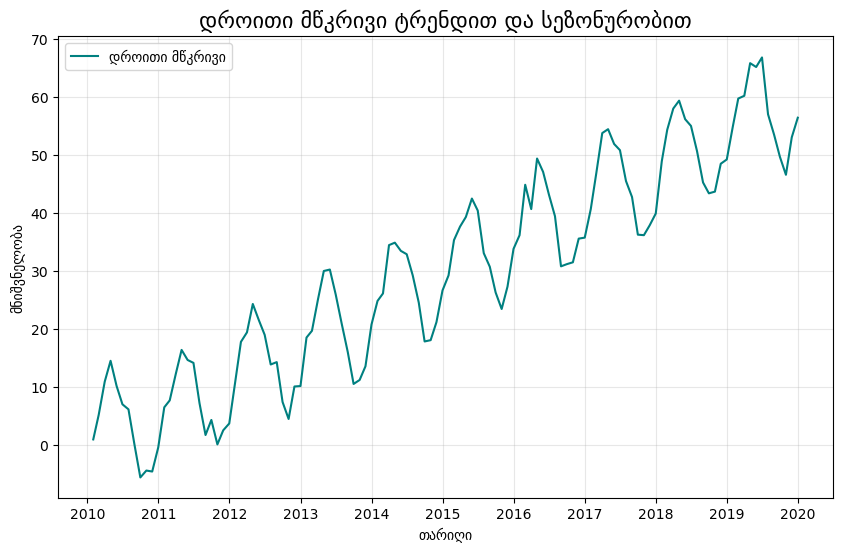

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# დროითი მწკრივის კომპონენტების გენერაცია
np.random.seed(42)
n = 120  # თვეების რაოდენობა
trend = np.linspace(0, 60, n)   # წრფივად მზარდი ტრენდი
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 12)    # სეზონური პატერნი (სინუსოიდური)
noise = np.random.normal(0, 2, n)    # შემთხვევითი ხმაური

# კომპონენტების გაერთიანება დროითი მწკრივის შესაქმნელად
time_series = trend + seasonality + noise

# დროითი ინდექსის და DataFrame-ის შექმნა
time_index = pd.date_range(start="2010-01", periods=n, freq="M")
df = pd.DataFrame({"თარიღი": time_index, "მნიშვნელობა": time_series})

# დროითი მწკრივის ვიზუალიზაცია
plt.figure(figsize=(10, 6))
plt.plot(df["თარიღი"], df["მნიშვნელობა"], label="დროითი მწკრივი",color="teal")
plt.title("დროითი მწკრივი ტრენდით და სეზონურობით",fontsize=16, color="black")
plt.xlabel("თარიღი")
plt.ylabel("მნიშვნელობა")
plt.legend()
plt.grid(alpha=0.3)
plt.show()




## **2. სტაციონარულობის ტესტი**

ჩაატარეთ გაფართოებული დიკი-ფულერის (ADF) ტესტი გენერირებულ დროით მწკრივზე და მწკრივი გარდაწმენით სტაციონარულობის მისაღწევად.

ADF სტატისტიკა: 0.9073098272679927
p-მნიშვნელობა: 0.9931849838828384
კრიტიკული მნიშვნელობები: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}


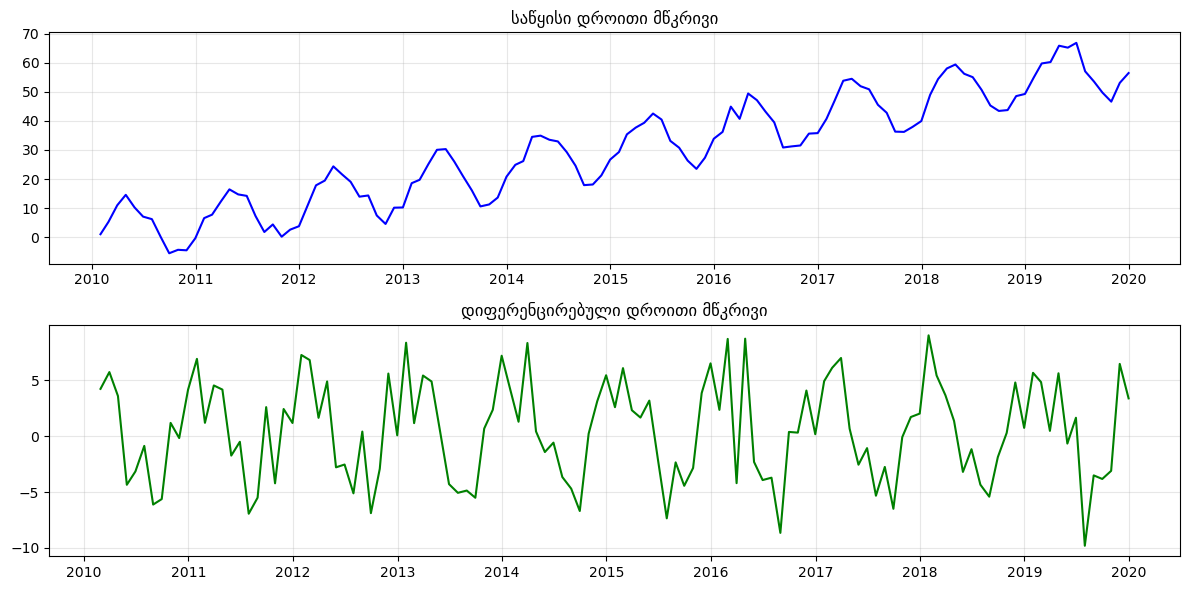

In [11]:
from statsmodels.tsa.stattools import adfuller

# ADF ტესტის ჩატარება
result = adfuller(df["მნიშვნელობა"])
print("ADF სტატისტიკა:", result[0])
print("p-მნიშვნელობა:", result[1])
print("კრიტიკული მნიშვნელობები:", result[4])

# ტრანსფორმაცია (დიფერენცირება)
df["დიფერენცირებული"] = df["მნიშვნელობა"].diff()

# საწყისი და დიფერენცირებული მწკრივების ვიზუალიზაცია
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df["თარიღი"], df["მნიშვნელობა"], label="ორიგინალი",color="blue")
plt.title("საწყისი დროითი მწკრივი")
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(df["თარიღი"].iloc[1:], df["დიფერენცირებული"].dropna(), label="დიფერენცირებული", color="green")
plt.title("დიფერენცირებული დროითი მწკრივი")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## **3. დროითი მწკრივის დეკომპოზიცია**

შეასრულეთ დროითი მწკრივის დეკომპოზიცია ტრენდის, სეზონურობის და ნარჩენობითი კომპონენტების მისაღებად.

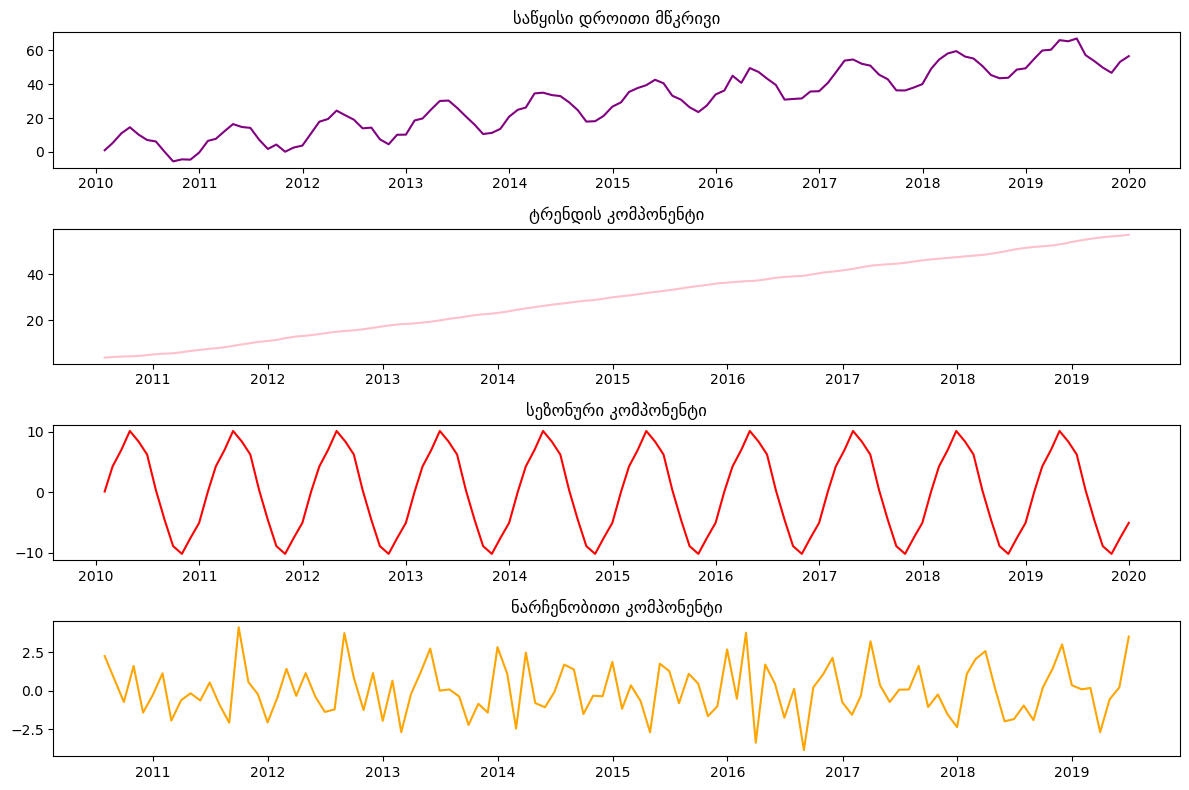

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# დროითი მწკრივის დეკომპოზიცია
decomposition = seasonal_decompose(df["მნიშვნელობა"], model="additive", period=12)

# კომპონენტების გამოყოფა
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# დეკომპოზირებული კომპონენტების ვიზუალიზაცია
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df["თარიღი"], df["მნიშვნელობა"], label="ორიგინალი",color="purple")
plt.title("საწყისი დროითი მწკრივი")

plt.subplot(4, 1, 2)
plt.plot(df["თარიღი"], trend, label="ტრენდი", color="pink")
plt.title("ტრენდის კომპონენტი")

plt.subplot(4, 1, 3)
plt.plot(df["თარიღი"], seasonal, label="სეზონური", color="red")
plt.title("სეზონური კომპონენტი")

plt.subplot(4, 1, 4)
plt.plot(df["თარიღი"], residual, label="ნარჩენობითი", color="orange")
plt.title("ნარჩენობითი კომპონენტი")

plt.tight_layout()
plt.show()

## **4. ARIMA მოდელის მორგება და პროგნოზირება**

მოარგეთ ARIMA მოდელი მე-2 ამოცანაში მიღებულ სტაციონარულ დროით მწკრივს და გააკეთეთ სამომავლო მნიშვნელობების პროგნოზი.


C:\Users\barba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


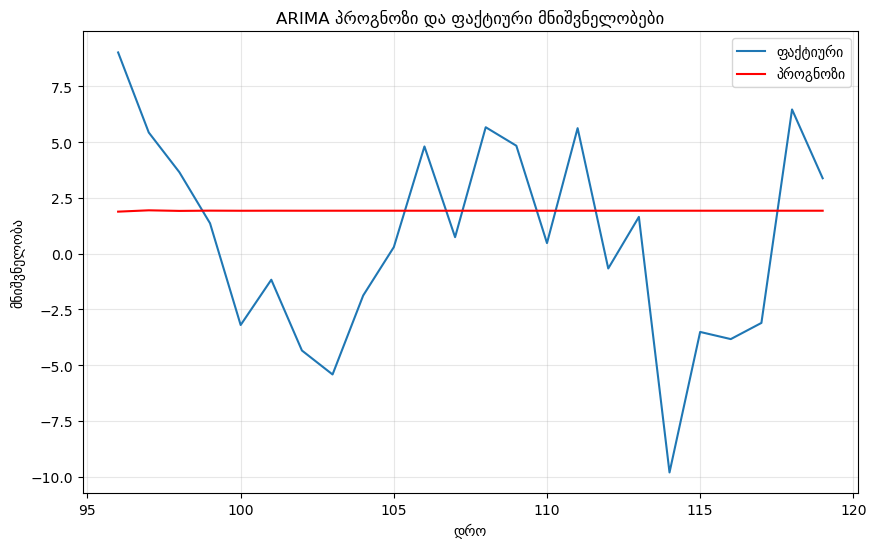

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# მონაცემების დაყოფა საწვრთნელ და სატესტო ნაწილებად
train_size = int(len(df["დიფერენცირებული"].dropna()) * 0.8)
train = df["დიფერენცირებული"].dropna().iloc[:train_size]
test = df["დიფერენცირებული"].dropna().iloc[train_size:]

# ARIMA მოდელის მორგება
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# პროგნოზირება
forecast =fitted_model.forecast(steps=len(test))

# ვიზუალიზება
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label="ფაქტიური")
plt.plot(test.index, forecast, label="პროგნოზი", color="red")
plt.title("ARIMA პროგნოზი და ფაქტიური მნიშვნელობები")
plt.xlabel("დრო")
plt.ylabel("მნიშვნელობა")
plt.legend()
plt.grid(alpha=0.3)
plt.show()